# método dos momentos - placa em L

usando a base descrita nos outros dois notebooks vamos mudar a geometria de nossa placa carregada para um L e observar o comportamento da distribuição de carga. 

In [ ]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt


L = 12
n = 12
delta = L / n

V0 = 1.0
e0 = 8.854 * 1e-12

precisamos ignorar o "quarto quadrante da placa" por isso ao adicionar os centros ignoramos o espaça onde x e y são ambos maiores que L/2.

In [ ]:
def centers(L, n):
  delta = L/n
  max = math.ceil(L/2)
  rn  = []
  for i in range(1, n +1):
    for j in range(1, n+1):
      x = delta*j - delta*0.5
      y = delta*i - delta*0.5
      if x < max or y < max:
        rn.append( [  x, y  ] )
  return rn

rn = np.array(centers(L,n))
print(rn.shape)
print(rn)


(108, 2)
[[ 0.5  0.5]
 [ 1.5  0.5]
 [ 2.5  0.5]
 [ 3.5  0.5]
 [ 4.5  0.5]
 [ 5.5  0.5]
 [ 6.5  0.5]
 [ 7.5  0.5]
 [ 8.5  0.5]
 [ 9.5  0.5]
 [10.5  0.5]
 [11.5  0.5]
 [ 0.5  1.5]
 [ 1.5  1.5]
 [ 2.5  1.5]
 [ 3.5  1.5]
 [ 4.5  1.5]
 [ 5.5  1.5]
 [ 6.5  1.5]
 [ 7.5  1.5]
 [ 8.5  1.5]
 [ 9.5  1.5]
 [10.5  1.5]
 [11.5  1.5]
 [ 0.5  2.5]
 [ 1.5  2.5]
 [ 2.5  2.5]
 [ 3.5  2.5]
 [ 4.5  2.5]
 [ 5.5  2.5]
 [ 6.5  2.5]
 [ 7.5  2.5]
 [ 8.5  2.5]
 [ 9.5  2.5]
 [10.5  2.5]
 [11.5  2.5]
 [ 0.5  3.5]
 [ 1.5  3.5]
 [ 2.5  3.5]
 [ 3.5  3.5]
 [ 4.5  3.5]
 [ 5.5  3.5]
 [ 6.5  3.5]
 [ 7.5  3.5]
 [ 8.5  3.5]
 [ 9.5  3.5]
 [10.5  3.5]
 [11.5  3.5]
 [ 0.5  4.5]
 [ 1.5  4.5]
 [ 2.5  4.5]
 [ 3.5  4.5]
 [ 4.5  4.5]
 [ 5.5  4.5]
 [ 6.5  4.5]
 [ 7.5  4.5]
 [ 8.5  4.5]
 [ 9.5  4.5]
 [10.5  4.5]
 [11.5  4.5]
 [ 0.5  5.5]
 [ 1.5  5.5]
 [ 2.5  5.5]
 [ 3.5  5.5]
 [ 4.5  5.5]
 [ 5.5  5.5]
 [ 6.5  5.5]
 [ 7.5  5.5]
 [ 8.5  5.5]
 [ 9.5  5.5]
 [10.5  5.5]
 [11.5  5.5]
 [ 0.5  6.5]
 [ 1.5  6.5]
 [ 2.5  6.5]
 [ 3.5  6.5]
 [ 

nossos centros e matriz de impedancia terão agora um tamanho de 3/4*N² ao inves de N².

In [ ]:
def impedance_matrix( rn, N, Delta ):
  epsilon0 = e0
  matrix = []
  for m in range(0 , math.ceil( (3/4)*N**2) ):
    line = []
    for n in range(0 , math.ceil( (3/4)*N**2) ):
      if n == m:
          zmn = (delta/(math.pi * epsilon0))*(math.log(1 + math.sqrt(2)))
          line.append(zmn)
      else:        
          zmn = 1/(4 * math.pi * epsilon0) * math.pow(Delta, 2)/math.sqrt(math.pow(rn[m][0] - rn[n][0], 2) + math.pow( rn[m][1] - rn[n][1], 2) )
          line.append(zmn)

    matrix.append(line)
  return matrix



rn = centers(L, n)
rm = centers(L, n)

Zmn = np.array( impedance_matrix(rn, n, delta))

print(Zmn.shape)
print(Zmn)

(108, 108)
[[3.16862352e+10 8.98774244e+09 4.49387122e+09 ... 7.88277158e+08
  7.67874658e+08 7.43830857e+08]
 [8.98774244e+09 3.16862352e+10 8.98774244e+09 ... 8.03888122e+08
  7.88277158e+08 7.67874658e+08]
 [4.49387122e+09 8.98774244e+09 3.16862352e+10 ... 8.13711967e+08
  8.03888122e+08 7.88277158e+08]
 ...
 [7.88277158e+08 8.03888122e+08 8.13711967e+08 ... 3.16862352e+10
  8.98774244e+09 4.49387122e+09]
 [7.67874658e+08 7.88277158e+08 8.03888122e+08 ... 8.98774244e+09
  3.16862352e+10 8.98774244e+09]
 [7.43830857e+08 7.67874658e+08 7.88277158e+08 ... 4.49387122e+09
  8.98774244e+09 3.16862352e+10]]


In [ ]:
def tension(V0, n):
  return np.full( math.ceil(3/4 * n**2), 2*e0*V0)

v= np.array(tension(V0, n))
print(v.shape)
print(v)

(108,)
[1.7708e-11 1.7708e-11 1.7708e-11 1.7708e-11 1.7708e-11 1.7708e-11
 1.7708e-11 1.7708e-11 1.7708e-11 1.7708e-11 1.7708e-11 1.7708e-11
 1.7708e-11 1.7708e-11 1.7708e-11 1.7708e-11 1.7708e-11 1.7708e-11
 1.7708e-11 1.7708e-11 1.7708e-11 1.7708e-11 1.7708e-11 1.7708e-11
 1.7708e-11 1.7708e-11 1.7708e-11 1.7708e-11 1.7708e-11 1.7708e-11
 1.7708e-11 1.7708e-11 1.7708e-11 1.7708e-11 1.7708e-11 1.7708e-11
 1.7708e-11 1.7708e-11 1.7708e-11 1.7708e-11 1.7708e-11 1.7708e-11
 1.7708e-11 1.7708e-11 1.7708e-11 1.7708e-11 1.7708e-11 1.7708e-11
 1.7708e-11 1.7708e-11 1.7708e-11 1.7708e-11 1.7708e-11 1.7708e-11
 1.7708e-11 1.7708e-11 1.7708e-11 1.7708e-11 1.7708e-11 1.7708e-11
 1.7708e-11 1.7708e-11 1.7708e-11 1.7708e-11 1.7708e-11 1.7708e-11
 1.7708e-11 1.7708e-11 1.7708e-11 1.7708e-11 1.7708e-11 1.7708e-11
 1.7708e-11 1.7708e-11 1.7708e-11 1.7708e-11 1.7708e-11 1.7708e-11
 1.7708e-11 1.7708e-11 1.7708e-11 1.7708e-11 1.7708e-11 1.7708e-11
 1.7708e-11 1.7708e-11 1.7708e-11 1.7708e-11 1.7708e-11

In [ ]:
coeficients = np.linalg.solve(Zmn, v)
print(coeficients.shape)
print(coeficients)

(108,)
[1.73579928e-22 1.14420396e-22 1.04373723e-22 9.91478945e-23
 9.65593449e-23 9.55924712e-23 9.59112619e-23 9.75118588e-23
 1.00730795e-22 1.06616693e-22 1.17444260e-22 1.79290420e-22
 1.14420396e-22 5.84113777e-23 5.13634653e-23 4.79379158e-23
 4.63964859e-23 4.59112657e-23 4.62222490e-23 4.73162502e-23
 4.94383444e-23 5.34437231e-23 6.11625183e-23 1.20373027e-22
 1.04373723e-22 5.13634653e-23 4.42846529e-23 4.09478883e-23
 3.95492353e-23 3.92361225e-23 3.97266016e-23 4.09835288e-23
 4.32393959e-23 4.73719472e-23 5.53084699e-23 1.12513884e-22
 9.91478945e-23 4.79379158e-23 4.09478883e-23 3.77430812e-23
 3.65634636e-23 3.65867841e-23 3.75100953e-23 3.92049873e-23
 4.18359930e-23 4.62581437e-23 5.43952634e-23 1.11375622e-22
 9.65593449e-23 4.63964859e-23 3.95492353e-23 3.65634636e-23
 3.57996394e-23 3.65932275e-23 3.84634766e-23 4.12087813e-23
 4.46978683e-23 4.97298343e-23 5.81582230e-23 1.16707096e-22
 9.55924712e-23 4.59112657e-23 3.92361225e-23 3.65867841e-23
 3.65932275e-23 4

precisamos agora refazer o formato de nosso matriz de coeficientes para que possamos plota-la. o que a função c_reshape faz abaixo é preencher os pontos da matriz com zero aonde não há placa. 

aqui temos de ter cuidado para não alterarmos a ordenação dos coeficientes referentes ao x,y do espaço que queremos plotar.

In [ ]:
def c_reshape(c,N):
  newc = []
  i = 0
  mod  = math.ceil(N/2)
  for i in range(0, math.ceil((N**2)/2)):
    newc.append(c[i])
  i = i+1

  for j in range( i , len(c)):
    if j % mod == math.ceil(mod -1):
      for k in range(0, mod+1):
        newc.append(0)
    else:
      newc.append(c[j])
  return newc
  

print(coeficients.shape)
c = np.array(c_reshape(coeficients,n))
print(c.shape)


(108,)
(144,)


[ 0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5]
Z [1.73579928e-22 1.14420396e-22 1.04373723e-22 9.91478945e-23
 9.65593449e-23 9.55924712e-23 9.59112619e-23 9.75118588e-23
 1.00730795e-22 1.06616693e-22 1.17444260e-22 1.79290420e-22]
(12, 12)


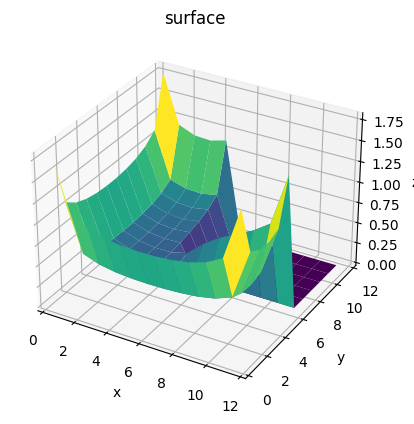

In [ ]:


x = np.linspace( delta/2 , L -(delta/2) , n)
print(x)
X, Y = np.meshgrid( x, x)

Z = np.reshape(c, (n,n))

print("Z",Z[0]) 
print(X.shape)


fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(0, 0)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');


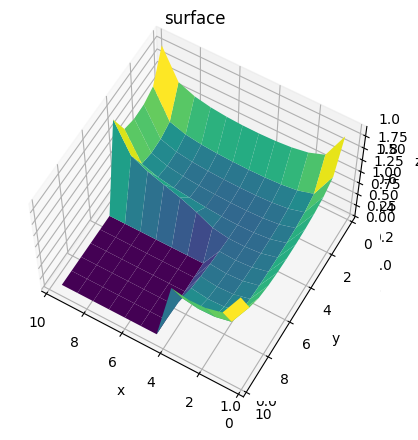

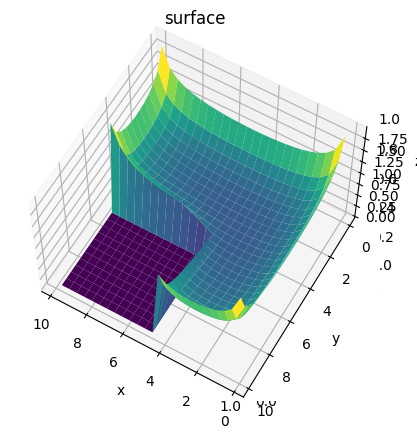

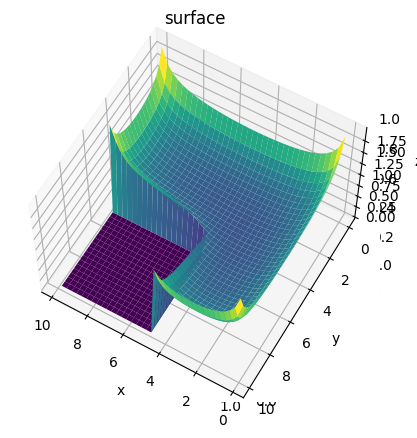

In [ ]:
def plot(L,n,v0):
  delta = L/n
  rn = np.array(centers(L,n))
  Zmn = np.array( impedance_matrix(rn, n, delta))
  v= np.array(tension(V0, n))
  coeficients = np.linalg.solve(Zmn, v)

  x = np.linspace( delta/2 , L -(delta/2) , n)
  
  X, Y = np.meshgrid( x, x)
  c = c_reshape(coeficients, n)
  Z = np.reshape(c, (n,n)) 

  fig = plt.figure()
  ax = plt.axes(projection='3d')
  #ax = plt.figure().add_subplot(projection='3d')

  ax = plt.axes(projection='3d')
  ax.view_init(elev=60, azim=120, roll=0)
  ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
  ax.set_title('surface');

  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('z');

#plot(12,24,1)

for i in range(0,3):
  plot(10 , 12 + i*12, 1)